## Alaska.JointInversion_RF+Vph+HV-1.Berg.2020
Details of the dataset:
- Name: Alaska.JointInversion_RF+Vph+HV-1.Berg.2020
- Title: Shear Velocity Model of Alaska via Joint Inversion of Rayleigh Wave Ellipticity, Phase Velocities, and Receiver Functions across the Northern USArray
- Type:	3-D Tomography Earth Model
- Sub Type: Shear-wave velocity (km/s)
- Year	2020

Author(s):	
- lizabeth M. Berg 
  - Department of Geology & Geophysics University of Utah 115 South 1460 East, Salt Lake City, UT 84112, USA
- Fan-Chi Lin 
  - Department of Geology & Geophysics University of Utah 115 South 1460 East, Salt Lake City, UT 84112, USA
- Amir Allam 
  - Department of Geology & Geophysics University of Utah 115 South 1460 East, Salt Lake City, UT 84113, USA
- Vera Schulte-Pelkum 
  - Cooperative Institute for Research in Environmental Sciences and Department of Geological Sciences University of Colorado Boulder 216 UCB, Boulder, CO, USA
- Kevin M. Ward 
  - Department of Geology and Geological Engineering South Dakota School of Mines and Technology 501 E. St. Joseph St., Rapid City, SD, USA
- Weisen Shen 
  - Department of Geosciences Stony Brook University 255 Earth and Space Sciences Building (ESS) Stony Brook, NY, USA

Reference(s):	
- Berg, E. M., Lin, F.‐C., Allam, A., Schulte‐Pelkum, V., Ward, K. M., & Shen, W. ( 2020). Shear velocity model of Alaska via joint inversion of Rayleigh wave ellipticity, phase velocities, and receiver functions across the Alaska transportable Array. Journal of Geophysical Research: Solid Earth, 125, e2019JB018582. https://0120100299/https://doi.org/10.1029/2019JB018582
  
DOI:	doi:10.17611/DP/18277053

Depth Coverage:	0.0 - 144.0 km

Areal Coverage:	Latitude: 50.0 to 75.0 Longitude: -180.0 to -120.0

Model Description: 
- Alaska.JointInversion_RF+Vph+HV-1.Berg.2020 includes S-wave velocity structure across Alaska from joint inversion of ambient noise and earthquake tomography (phase velocity) and Rayleigh wave ellipticity; also includes data from receiver functions. Relations of Vp and density to Vs used to constrain Vp and Vs in Markov Chain Monte Carlo joint inversion. Final result from follow-up deterministic inversion.

Data Set Description: 
- [Berg et al., (2020)](https://doi.org/10.1029/2019JB018582): Dataset includes S-wave velocity structure across Alaska from joint inversion of ambient noise and earthquake tomography (phase velocity) and Rayleigh wave ellipticity; also includes data from receiver functions. Relations of Vp and density to Vs used to constrain Vp and density in Markov Chain Monte Carlo joint inversion. Final result from follow-up deterministic inversion.

EMC Page:
- [ds.iris.edu/ds/products/emc-alaskajointinversion_rfvphhv-1berg2020/](https://ds.iris.edu/ds/products/emc-alaskajointinversion_rfvphhv-1berg2020/)

## Step0: Downloading & Loading the Source Datasets

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_path = "../../../OpenSWI/Datasets/Original/OpenSWI-deep/Alaska.JointInversion-RF+Vph+HV-1.Berg.2020-nc4.nc"

# load the .nc file
data = xr.open_dataset(data_path)

# print the keys of the dataset
print(data.keys())

KeysView(<xarray.Dataset>
Dimensions:    (latitude: 251, longitude: 301, depth: 156)
Coordinates:
  * latitude   (latitude) float32 50.0 50.1 50.2 50.3 ... 74.7 74.8 74.9 75.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... -120.4 -120.2 -120.0
  * depth      (depth) float32 0.0 0.25 0.5 0.75 1.0 ... 141.0 142.0 143.0 144.0
Data variables:
    vpfinal    (depth, latitude, longitude) float32 ...
    vsfinal    (depth, latitude, longitude) float32 ...
    rhofinal   (depth, latitude, longitude) float32 ...
    vpMC       (depth, latitude, longitude) float32 ...
    vsMC       (depth, latitude, longitude) float32 ...
    rhoMC      (depth, latitude, longitude) float32 ...
    vsUncMC    (depth, latitude, longitude) float32 ...
    elevation  (depth, latitude, longitude) float32 ...
Attributes: (12/30)
    title:                         Shear Velocity Model of Alaska via Joint I...
    id:                            Alaska.JointInversion_RF+Vph+HV-1.Berg.2020
    summary:      

## Step 1: Velocity Profile Extracting
1. Extracting
2. De-duplicating

In [2]:
latitude = np.array(data['latitude'].values)
longitude = np.array(data['longitude'].values)
depth = np.array(data['depth'].values)
vs = np.array(data['vsfinal'].values)

LON,LAT = np.meshgrid(longitude,latitude)


latitude.shape,longitude.shape,depth.shape,vs.shape

((251,), (301,), (156,), (156, 251, 301))

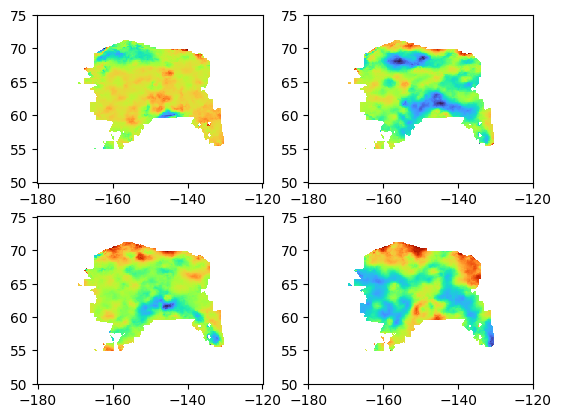

In [3]:
depth_idxs = [20,50,60,100]

fig,axes = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        axes[i][j].pcolormesh(LON,LAT,vs[depth_idxs[i*2+j]],cmap='turbo')
plt.show()

## Step 2: Quality Control & Interpolation

In [ ]:
import sys
sys.path.append('../../../')
from SWIDP.process_1d_deep import *
from SWIDP.dispersion import *

In [5]:
# ------------------------------------------
# Exclude the invalid values
# ------------------------------------------
vs_valid_1d = vs.reshape(vs.shape[0],-1)
vs_valid_mask = np.sum(~np.isnan(vs_valid_1d),axis=0)>0
vs_valid_1d = vs_valid_1d[:,vs_valid_mask]
vs_valid_1d.shape


(156, 19408)

In [6]:
vs = vs_valid_1d.T
depth.max()

144.0

In [7]:
# -------------------------------------------------------
#  interp to 1 km thickness
# -------------------------------------------------------
from scipy.interpolate import interp1d

max_depth = 300+0.1
depth_interp = np.concatenate([
    np.arange(0, max_depth, 1)
])
vs_models = vs_interp = np.zeros((vs.shape[0],depth_interp.shape[0]))
for i in range(vs.shape[0]):
    vs_temp = vs[i,:]
    depth_interp_temp = depth_interp[:np.argmin(np.abs(depth_interp-depth.max()))]
    f = interp1d(depth.reshape(-1),vs_temp,kind='nearest')
    vs_temp = f(depth_interp_temp)
    vs_interp[i,:len(vs_temp)] = vs_temp
vs_interp[:,len(vs_temp):] = vs_interp[:,len(vs_temp)-1].reshape(-1,1)
vs_interp.shape

(19408, 301)

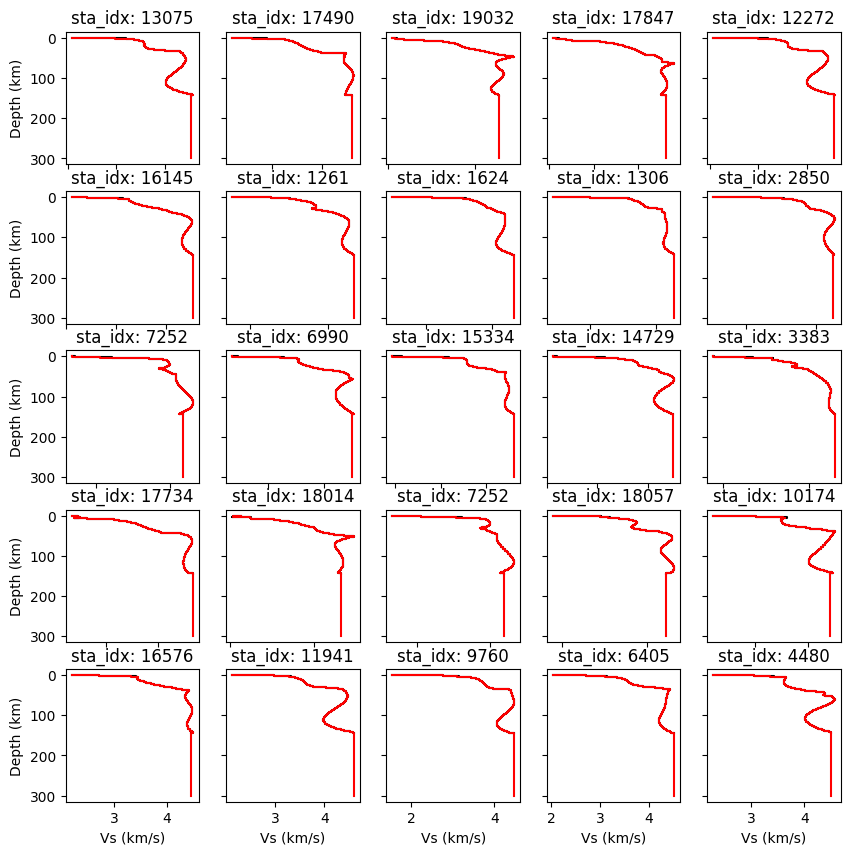

In [8]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs[sta_idx,:],depth,c='k')
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

In [9]:
# -------------------------------------------------------
#  remove the sandwich layers
# -------------------------------------------------------
from p_tqdm import p_map
# process all the stations
vs_interp_rm_sandwich = p_map(combine_thin_sandwich,
                            vs_interp,
                            list(depth_interp.reshape(1,-1))*len(vs_interp),
                            [6]*len(vs_interp),
                            [1]*len(vs_interp),
                            [0.05]*len(vs_interp),
                            [False]*len(vs_interp))

# find the moho depth
vs_interp_rm_sandwich = np.array(vs_interp_rm_sandwich)
vs_interp_rm_sandwich.shape


  0%|          | 0/19408 [00:00<?, ?it/s]

(19408, 301)

In [10]:
# -------------------------------------------------------
#  Smooth velocity model (B spline)
# -------------------------------------------------------
from p_tqdm import p_map
# process all the stations
vs_interp_rm_sandwich = p_map(smooth_vs_by_node_interp,
                            vs_interp_rm_sandwich,
                            list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                            [12]*len(vs_interp_rm_sandwich))

# find the moho depth
vs_interp_rm_sandwich = np.array(vs_interp_rm_sandwich)
vs_interp_rm_sandwich.shape


  0%|          | 0/19408 [00:00<?, ?it/s]

(19408, 301)

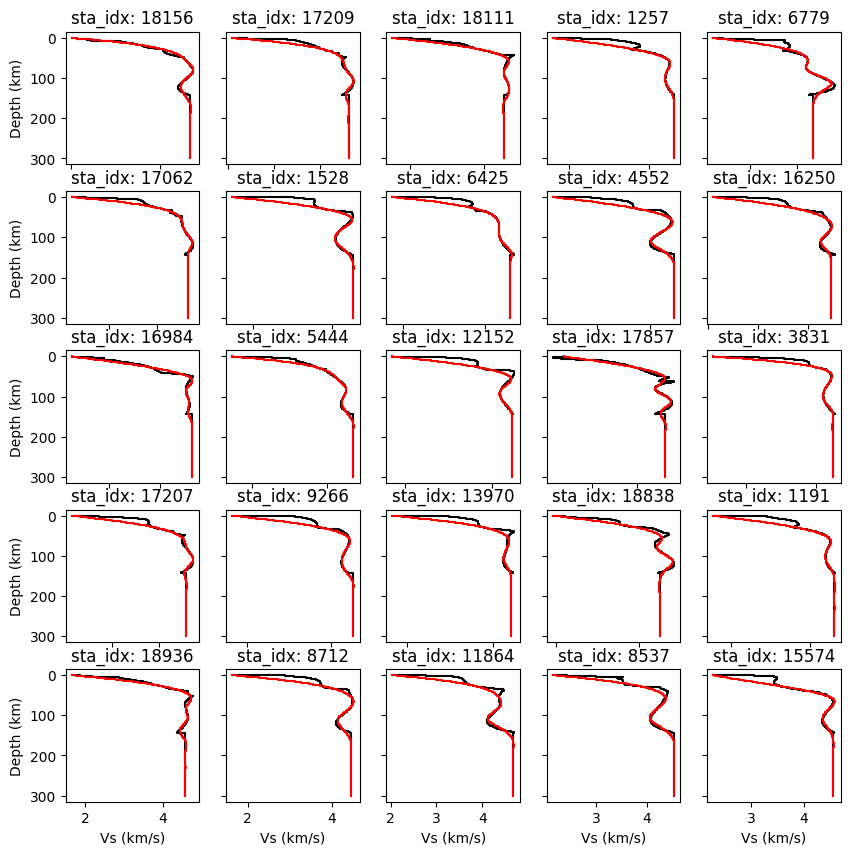

In [11]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='k')
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 3: Find the Moho 

In [12]:
moho_idxs = p_map(find_moho_depth,
                  vs_interp_rm_sandwich,
                  list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                  [[5,100]]*len(vs_interp_rm_sandwich),
                  [True]*len(vs_interp_rm_sandwich),
                  [0.01]*len(vs_interp_rm_sandwich),
                  [20]*len(vs_interp_rm_sandwich))
moho_idxs = np.array(moho_idxs)
moho_idxs.shape

  0%|          | 0/19408 [00:00<?, ?it/s]

(19408,)

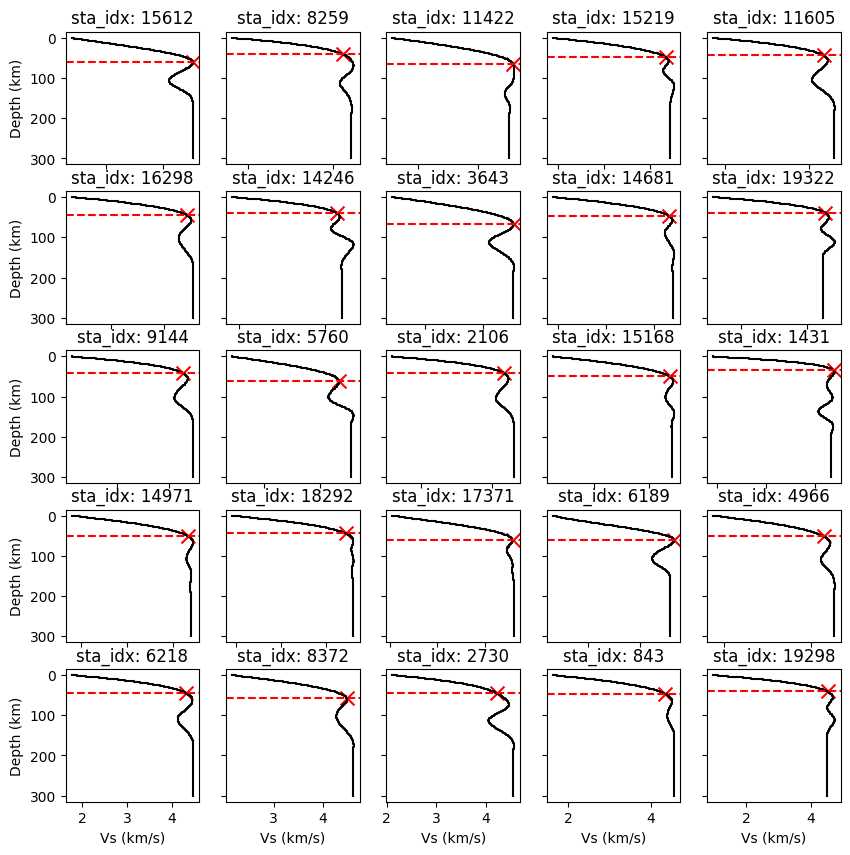

In [13]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        moho_depth_idx = moho_idxs[sta_idx]
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='k')
        axs[i,j].axhline(y = depth_interp[moho_depth_idx],color='r',linestyle='--')
        axs[i,j].scatter(vs_interp_rm_sandwich[sta_idx,moho_depth_idx],depth_interp[moho_depth_idx],c='r',marker='x',s=100)
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 4: Perturbation the Moho depth and velocity

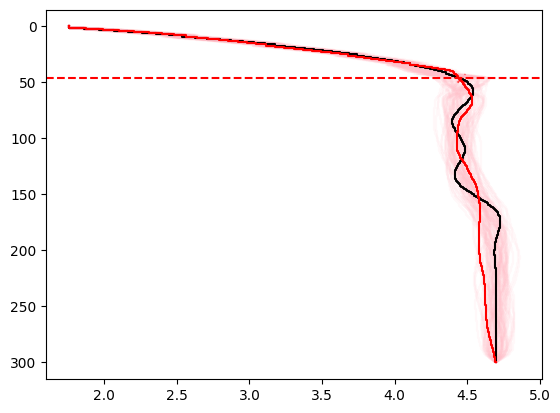

(100, 301)

In [58]:
# Generate perturbed models single
i = 100
vs_orig = vs_interp_rm_sandwich[i]
# Find Moho
moho_idx = moho_idxs[i]
plt.figure()
plt.step(vs_orig,depth_interp,c='k')
plt.scatter(vs_orig[moho_idx],depth_interp[moho_idx],c='r',marker='x')
plt.axhline(y=depth_interp[moho_idx],color='r',linestyle='--')

vs_perts = []
perturb_num = 100
random_seeds = np.random.randint(0,1000000,perturb_num)
for i in range(perturb_num):
    # Generate perturbed profile
    vs_pert, controle_node_t, controle_node_vs = augment_crust_moho_mantle(vs_orig, 
                                                                depth_interp, 
                                                                moho_idx, 
                                                                vs_perturb_range=[-0.2,0.2],
                                                                crust_nodes_range=[3,8],
                                                                mantle_nodes_range=[8,12],
                                                                moho_shift_range=5,
                                                                gaussian_smooth_sigma=1,
                                                                return_nodes=True,
                                                                random_seed=random_seeds[i])
    # plot the perturbed profile
    plt.step(vs_pert,depth_interp,c='pink' if i !=0 else 'r',alpha=0.1 if i !=0 else 1, zorder=1 if i !=0 else 2)
    # plt.scatter(controle_node_vs,controle_node_t,c='b',alpha=0.2)
    vs_perts.append(vs_pert)
vs_perts = np.array(vs_perts)
plt.gca().invert_yaxis()
plt.show()
np.unique(vs_perts,axis=0).shape

In [59]:
vs_interp_rm_sandwich.shape,moho_idxs.shape

((19408, 301), (19408,))

In [60]:
perturb_num = 5
aug_vs_list = [vs_interp_rm_sandwich]
for i in range(perturb_num):
    # perturb the moho depth and velocity 1 time
    random_seeds = np.random.randint(0,1000000,len(vs_interp_rm_sandwich))
    aug_vs_list_temp = p_map(augment_crust_moho_mantle,
                                vs_interp_rm_sandwich,
                                list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                                moho_idxs,
                                [[-0.2,0.2]]*len(vs_interp_rm_sandwich),
                                [[3,8]]*len(vs_interp_rm_sandwich),
                                [[8,12]]*len(vs_interp_rm_sandwich),
                                [5]*len(vs_interp_rm_sandwich),
                                [1]*len(vs_interp_rm_sandwich),
                                [False]*len(vs_interp_rm_sandwich),
                                random_seeds)
    aug_vs_list.append(aug_vs_list_temp)
aug_vs_list = np.array(aug_vs_list)
aug_vs_list.shape

  0%|          | 0/19408 [00:00<?, ?it/s]

  0%|          | 0/19408 [00:00<?, ?it/s]

  0%|          | 0/19408 [00:00<?, ?it/s]

  0%|          | 0/19408 [00:00<?, ?it/s]

  0%|          | 0/19408 [00:00<?, ?it/s]

(6, 19408, 301)

In [61]:
aug_vs_list.shape

(6, 19408, 301)

In [62]:
# # -------------------------------------------------------
# #  Smooth velocity model (B spline)
# # -------------------------------------------------------
# from p_tqdm import p_map
# temp_aug_vs_list = aug_vs_list.reshape(-1,aug_vs_list.shape[-1])

# # process all the stations
# aug_vs_list = p_map(smooth_vs_by_node_interp,
#                     temp_aug_vs_list,
#                     list(depth_interp.reshape(1,-1))*len(temp_aug_vs_list),
#                     [20]*len(temp_aug_vs_list))

# # find the moho depth
# aug_vs_list = np.array(aug_vs_list)
# aug_vs_list = aug_vs_list.reshape(perturb_num+1,-1,aug_vs_list.shape[-1])
# aug_vs_list.shape


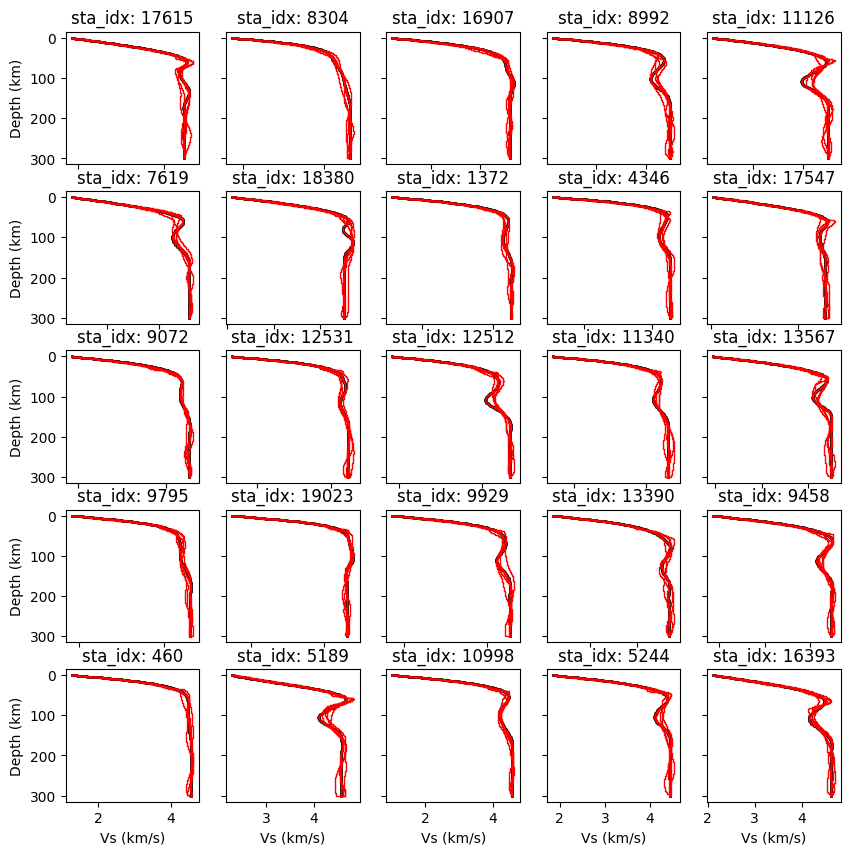

In [63]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs_interp_rm_sandwich))
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='k',label='original', linewidth=2)

        for k in range(perturb_num):
            axs[i,j].step(aug_vs_list[k,sta_idx,:],depth_interp,c='r',label='perturbed' if k == 0 else None, linewidth=1)

        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 5: Dispersion Curve Inversion

In [64]:
vs_models = aug_vs_list.reshape(-1,aug_vs_list.shape[-1]) # [n_models,n_depth]
depth_models = list(depth_interp.reshape(1,-1))*len(vs_models)
vel_models = p_map(transform_vs_to_vel_model,vs_models,depth_models)
vel_models = np.array(vel_models)
vel_models.shape

  0%|          | 0/116448 [00:00<?, ?it/s]

(116448, 301, 4)

In [65]:
# Calculate dispersion curves
t = generate_mixed_samples(num_samples=300,start=1,end=100,uniform_num=100,log_num=100,random_num=100)
t = np.ones((len(vel_models),len(t)))*t
disp_data = p_map(calculate_dispersion, vel_models, list(t))
disp_data = np.array(disp_data)
vel_models = np.array(vel_models)
vel_models.shape,disp_data.shape

  0%|          | 0/116448 [00:00<?, ?it/s]

((116448, 301, 4), (116448, 300, 3))

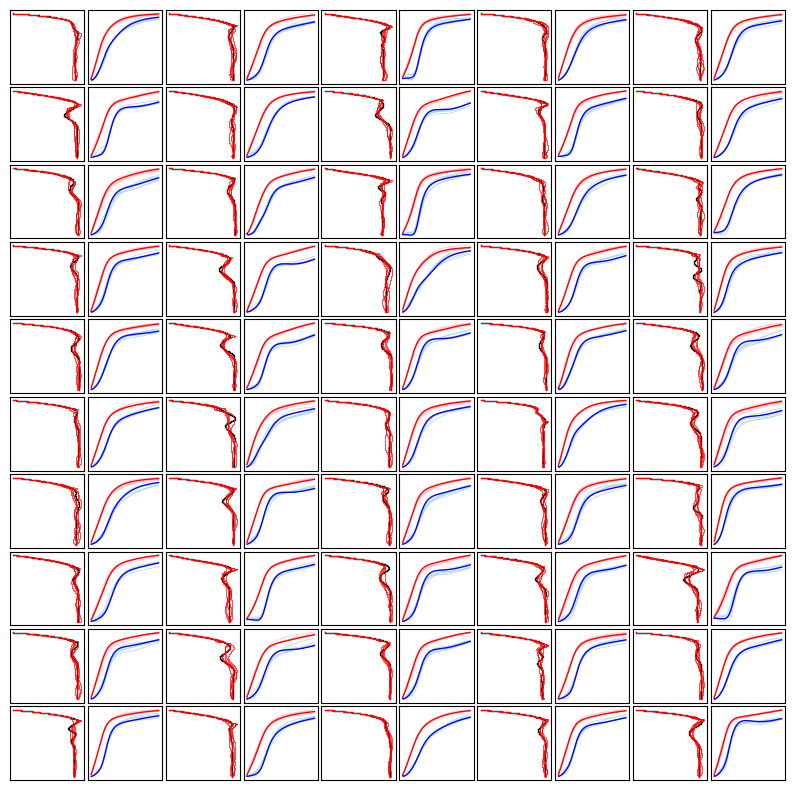

In [66]:
nrows = 10
ncols = 10
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))

for i in range(nrows):
    for j in range(ncols//2):

        sta_idx = np.random.randint(0,vs_interp_rm_sandwich.shape[0])
        
        # velocity profile
        for k in range(perturb_num+1):
            axs[i,j*2].step(vel_models[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,2],
                            vel_models[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                            linewidth=1 if k == 0 else 0.5,color='k' if k == 0 else 'r')
        axs[i,j*2].set_xticks([])
        axs[i,j*2].set_yticks([])
        axs[i,j*2].invert_yaxis()

        # dispersion curve
        for k in range(perturb_num+1):
            axs[i,j*2+1].plot(disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                                 disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,1],
                                 linewidth=1 if k==0 else 0.5,c='r' if k==0 else "pink", zorder=2 if k==0 else 1)
            axs[i,j*2+1].plot(disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                                 disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,2],
                                 linewidth=1 if k==0 else 0.5,c='b' if k==0 else "lightblue", zorder=2 if k==0 else 1)
        axs[i,j*2+1].set_xticks([])
        axs[i,j*2+1].set_yticks([])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
plt.show()

In [67]:
phase_mask = np.sum(disp_data[:,:,1] == 0,axis=1)==0
group_mask = np.sum(disp_data[:,:,2] == 0,axis=1)==0
mask = phase_mask*group_mask


# loc = np.hstack((LON.reshape(-1,1),LAT.reshape(-1,1)))[mask,:]
vel_models = vel_models[mask,:,:]
disp_data = disp_data[mask,:,:]

vel_models.shape,disp_data.shape

((116448, 301, 4), (116448, 300, 3))

In [ ]:
import os
save_base_path = "../../../OpenSWI/Datasets/OpenSWI-deep/1s-100s-Aug"
# Save processed data as compressed npz files
# loc = np.hstack((lon_solid,lat_solid))
# np.savez_compressed(os.path.join(save_base_path, "Alaska_loc.npz"),
#                     data=loc.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "Alaska_model.npz"),
                    data=vel_models.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "Alaska_disp.npz"),
                    data=disp_data.astype(np.float32))